In [ ]:
import numpy as np
from ufl.core.expr import Expr
from dolfinx.fem import FunctionSpace

from lucifex.fem import StaticFunction
from lucifex.mesh import create_rectangle
from lucifex.solver import interpolation_solver, projection_solver
from lucifex.viz import plot_colormap


def add_together(a, b) -> Expr:
    return a + b

Lx = 2.0
Ly = 1.0
mesh = create_rectangle(Lx, Ly, 10, 10)
fs = FunctionSpace(mesh, ('P', 1))
a = StaticFunction(fs)
b = StaticFunction(fs)

ab_sum = StaticFunction(fs)
ab_sum_solver = interpolation_solver(add_together)(ab_sum, a, b)

a.interpolate(lambda x: x[0])
b.interpolate(lambda x: x[1])
ab_sum_solver.solve()
print(np.min(ab_sum.x.array), np.max(ab_sum.x.array))
# plot_colormap(ab_sum)

a.interpolate(lambda x: -x[0])
ab_sum_solver.solve(overwrite=True)
print(np.min(ab_sum.x.array), np.max(ab_sum.x.array))
# plot_colormap(ab_sum)


1.665334536937735e-17 3.0
-2.0 1.0


(<Figure size 640x480 with 2 Axes>, <Axes: xlabel='$x$', ylabel='$y$'>)

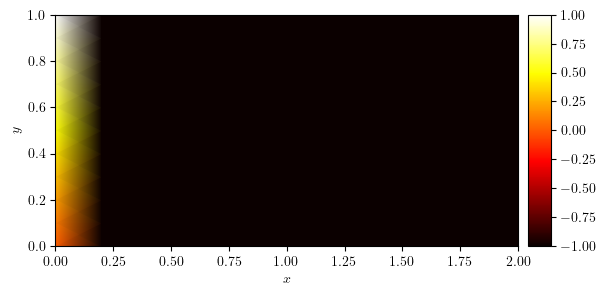

In [ ]:
def multiply_together(a, b):
    return a * b

ab_times = StaticFunction(fs)
dofs_corrector = [(lambda x: x[0], -1.0)] #FIXME
ab_times_solver = interpolation_solver(add_together, dofs_corrector)(ab_times, a, b)
ab_times_solver.solve()
plot_colormap(ab_times)



In [ ]:
from lucifex.viz import plot_colormap
from lucifex.utils import _grid, interpolate_to_fs, _triangulation

plot_colormap()

In [ ]:
'1:2:3'.split(':')

['1', '2', '3']

: 